# Predicting the demise of retail bookstores: a time series forecasting

## Results and Discussion
“The internet is killing retail. Bookstores are just the first to go.” -- quoted in the [NYT article](https://nyti.ms/2Eo5AWc). 
Signs are everywhere. Book World is closing it's stores and Barnes & Noble closed 10% of it's stores in just the last 5/6 years and this February it shedded [1800 jobs](https://bit.ly/2KjLUFf).  

The trend we are seeing will keep accelerating in the next few years. In fact retail bookstores are in death rows, it's a matter of time they will be history. eBooks are partly to blame, but with eBook sales leveling off recently, the remaining affect seems to be online book sales, dominated by, with no surpirse!, Amazon.  

So, exactly how long retail bookstores are going to survive? Is it going to be "Gradually and then suddenly"? Or could it be  5 years from now? You might wonder: "5 years? no way!!". But did you imagine the Amazon effect, or the Facebook effect in, let's say, 2010?  

To examine this I've got a nice [time series dataset](https://bit.ly/2BneUsI) from the Census Bereau database. It is a monthly retail sales data (in millions $) from bookstores all across the country. Data were collected monthly as part of Monthly Retail Trade Survey covering 26 years since 1992.    

A number of popular forecasting methods are out there, but since the data has seasonality (shown in Figure 1), I choose to run the Holt-Winter Exponential Smoothing (HW) -- a popular forecasting method in machine learning field ( I also ran ARIMA, but the results were less definitive (see appendix)). I am not going into technical discussion on theories behind forecasting methods, as there's a bunch of materials available online if you Google.  
 
So what exactly does the analysis tell? It shows that bookstore sales peaked around 2007, and since then the sales are going downlhill. The HW forecasting predicts that the bookstores may at best survive another 15-20 years from now. This roughly puts the lifeline of bookstores around 2040. That said, some bookstores may well survive beyond 2040, but not as traditional stores, rather as antique books stores.  


## Notebook

In [1]:
# Required packages
library(fpp2)
library(forecast)
library(readxl)
library(ggplot2)
library(seasonal)
library(dplyr)

options(warn=0)

Loading required package: ggplot2
Loading required package: forecast
Loading required package: fma
Loading required package: expsmooth

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# data import
df = read.csv("C:/Users/DataS/Google Drive/Python/Datasets/BookSales.csv", skip=6)
tail(df)[1:5,]

,Period,Value
319,Jul-2018,661
320,Aug-2018,1324
321,Sep-2018,946
322,Oct-2018,699
323,Nov-2018,NA


In [3]:
# keep only the `Value` column
df = df[, c(2)]

In [4]:
# convert the values into a time series object
series = ts(df, start = 1992, frequency =12)

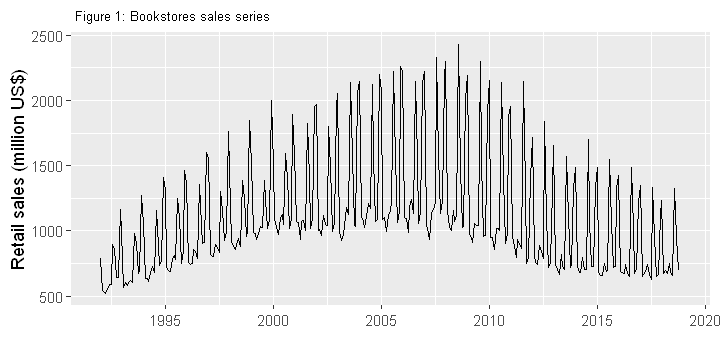

In [5]:
options(repr.plot.width = 6, repr.plot.height = 3)

# plot the series
autoplot(series)+ 
xlab(" ") + ylab("Retail sales (million US$)") + ggtitle(" Figure 1: Bookstores sales series")+
theme(plot.title = element_text(size=8))

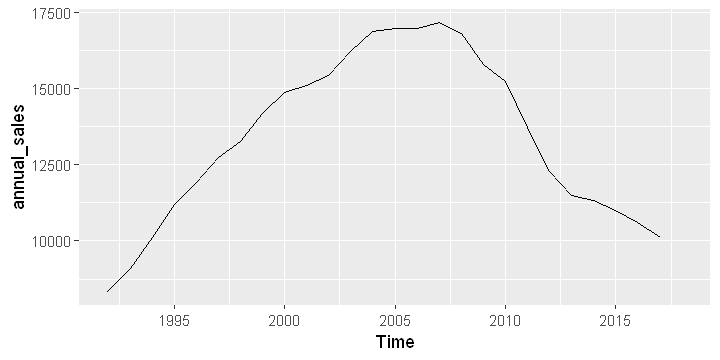

In [6]:
options(repr.plot.width = 6, repr.plot.height = 3)

# Aggregate annual sales
annual_sales=aggregate(series, nf=1, FUN=sum) # nf=1 > annual; nf=4 > quarterly; nf=12 > monthly 
autoplot(annual_sales)

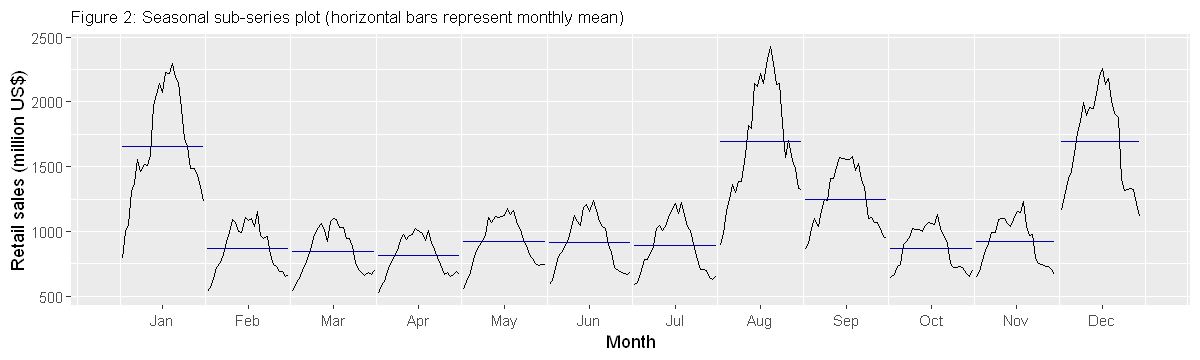

In [7]:
# Seasonal sub-series plot 
options(repr.plot.width = 10, repr.plot.height = 3)

series_season = window(series, start=c(1992,1), end=c(2018,10))
ggsubseriesplot(series_season) + ylab(" ") +
ggtitle("Figure 2: Seasonal sub-series plot (horizontal bars represent monthly mean)")+ ylab("Retail sales (million US$)")+
theme(plot.title = element_text(size=10))

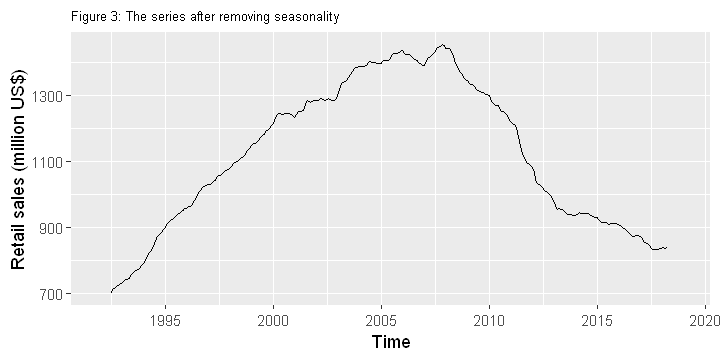

In [8]:
options(repr.plot.width = 6, repr.plot.height = 3)

# remove seasonality (monthly variation) to see yearly changes
series_ma = ma(series, 12)
autoplot(series_ma) + 
xlab("Time") + ylab("Retail sales (million US$)")+
ggtitle("Figure 3: The series after removing seasonality" )+
theme(plot.title = element_text(size=8))

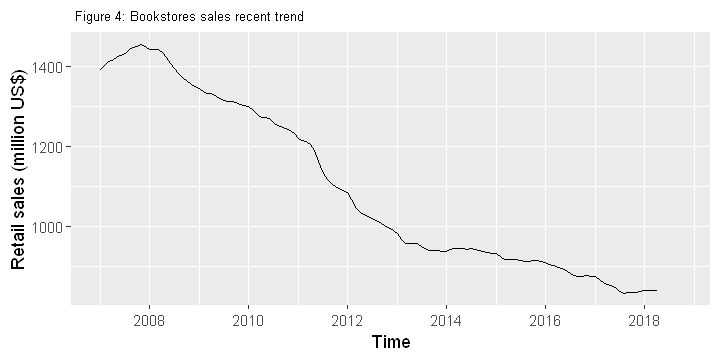

In [9]:
options(repr.plot.width = 6, repr.plot.height = 3)

# zooming in to the recent trend
series_downtime = window(series_ma, start=c(2007,1), end=c(2018,10))
autoplot(series_downtime) + 
xlab("Time") + ylab("Retail sales (million US$)")+
ggtitle(" Figure 4: Bookstores sales recent trend")+
theme(plot.title = element_text(size=8))

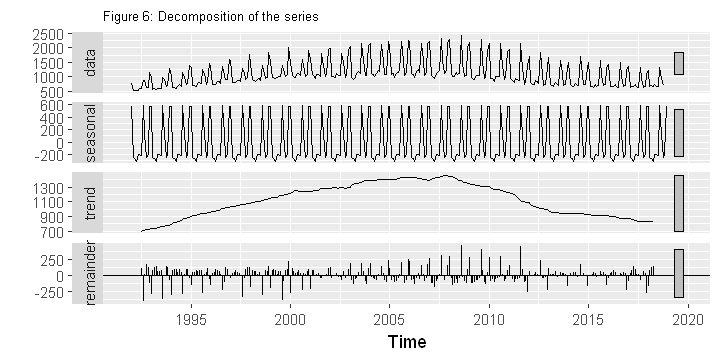

In [10]:
# decomposition
options(repr.plot.width = 6, repr.plot.height = 3)
autoplot(decompose(series)) + ggtitle("Figure 6: Decomposition of the series")+
theme(plot.title = element_text(size=8))


In [16]:
# model
# forecast_hw=hw(series_downtime, seasonal="multiplicative", h=63)

In [11]:
options(repr.plot.width = 10, repr.plot.height = 3)

# plot
'''autoplot(series, series = " 1992-2018 series")+ 
autolayer(series_downtime, series = "Predictor series")+
autolayer(forecast_hw, series="Holt-Winter forecast")+
 xlab("Time") + ylab("Retail sales (million US$)")+
ggtitle("Figure 7: HW Exponential Smoothing")+
theme(plot.title = element_text(size=8))'''

ERROR: Error in parse(text = x, srcfile = src): <text>:4:3: unexpected string constant
8: ggtitle("Figure 7: HW Exponential Smoothing")+
9: theme(plot.title = element_text(size=8))'
     ^


In [12]:
# predictor series
predictor_series =  window(series, start=c(2007,1), end=c(2018,10))

In [13]:
# model
forecast_hw=hw(predictor_series, seasonal="multiplicative", h=260)

Warning message:
"Removed 14 rows containing missing values (geom_path)."

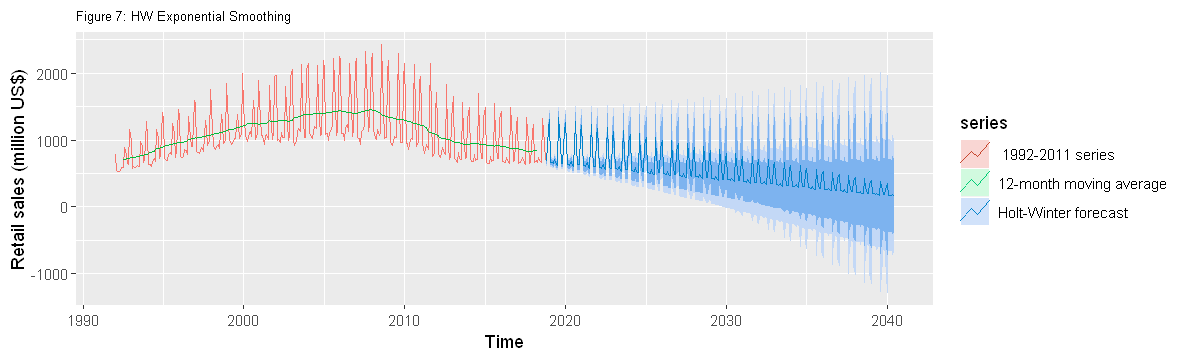

In [14]:
options(repr.plot.width = 10, repr.plot.height = 3)

# ploting the predictions
autoplot(series, series = " 1992-2011 series")+ 
autolayer(series_ma, series = "12-month moving average")+
autolayer(forecast_hw, series="Holt-Winter forecast")+
 xlab("Time") + ylab("Retail sales (million US$)")+
ggtitle("Figure 7: HW Exponential Smoothing")+
theme(plot.title = element_text(size=8))

In [21]:
# Fiting & prediction with ARIMA
fit.arima = auto.arima(series, seasonal=TRUE, stepwise = FALSE, approximation = FALSE) 
forecast_arima = forecast(fit.arima, h=160)

Warning message:
"Removed 14 rows containing missing values (geom_path)."

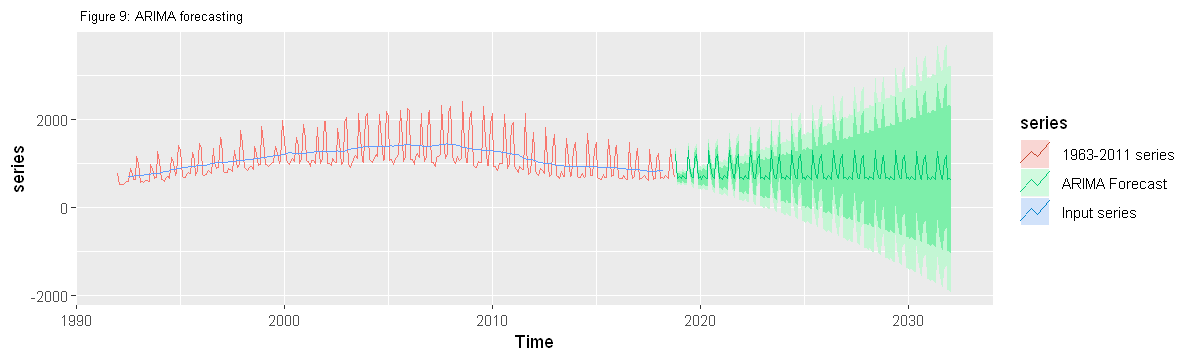

In [68]:
options(repr.plot.width = 10, repr.plot.height = 3)

# ploting ARIMA predictions
autoplot(series, series=" 1992-2018 series")+
autolayer(series_ma, series=" Input series")+
autolayer(forecast_arima, series=" ARIMA Forecast")+
ggtitle(" Figure 9: ARIMA forecasting")+
theme(plot.title = element_text(size=8))